In [ ]:
##################################
# Analysis -  Mouse Gastrulation #
##################################
# stage_endo_blood={'E7.0', 'E7.25', 'E7.5', 'E8.25', 'E7.75', 'E8.5', 'E8.0'}
# celltype_endo_blood={'Erythroid2', 'Blood progenitors 2', 'Erythroid3', 'Erythroid1', 'Blood progenitors 1',
#                    'Haematoendothelial progenitors','Blood progenitors 1'}
# Using all 2000 genes to plot cell velocity

In [80]:
from velocity_plot import velocity_plot as vpl
from turtle import color
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sampling import *
import pandas as pd
from colormap import *
import random
import os

In [2]:
# load raw
raw_data_path = "/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/scv_data_full.csv"
load_raw_data = pd.read_csv(raw_data_path)

# combine detail
detail_result_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes'
path_name_after_no='_all_geneepoch300check_n10Lr0.001C2cf0.3Downneighbors0_200_200Ratio0.5N30OAdamtraceR0.0corrcoefR0.0nD30autoDTrueautoNTruecostTsmoothavgCWin10p5smoW0.1binTrue/detail_e300.csv'
load_cellDancer=pd.DataFrame()
for i in range(1,11):
    detail_path=os.path.join(detail_result_path,(str(i)+path_name_after_no))
    detail=pd.read_csv(detail_path)
    
    detail.rename(columns = {'Unnamed: 0':'cellIndex'}, inplace = True) # for the optimize of data_reshape
    detail = detail.sort_values(by = ['gene_name', 'cellIndex'], ascending = [True, True]) # for the optimize of data_reshape

    load_cellDancer=load_cellDancer.append(detail)
load_cellDancer_bkup=load_cellDancer.copy()

# define output path
output_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/cell_velocity_tune'



In [3]:
load_cellDancer

cellIndex      gene_name        s0        u0        s1        u1  \
195888          0  2010107G23Rik  0.645871  0.000000  0.631752  0.000444   
195889          1  2010107G23Rik  0.659958  0.050844  0.667935  0.049499   
195890          2  2010107G23Rik  0.536477  0.031027  0.543241  0.030047   
195891          3  2010107G23Rik  0.172749  0.000000  0.168829  0.000422   
195892          4  2010107G23Rik  2.669759  0.024144  2.671663  0.020978   
...           ...            ...       ...       ...       ...       ...   
306763       3691         Zfp949  0.175796  0.175190  0.163429  0.174457   
306764       3692         Zfp949  0.078194  0.130215  0.086273  0.142232   
306765       3693         Zfp949  0.000000  0.044002  0.011225  0.076212   
306766       3694         Zfp949  0.041343  0.086365  0.050158  0.108793   
306767       3695         Zfp949  0.085127  0.232572  0.116726  0.219691   

           alpha      beta     gamma      cost  
195888  0.004090  0.033074  0.143236  0.085577  
195889  0.002315  0.013641  0.159593  0.085577  
195890  0.002852  0.018068  0.154822  0.085577  
195891  0.003884  0.025258  0.148675  0.085577  
195892  0.003705  0.064247  0.127344  0.085577  
...          ...       ...       ...       ...  
306763  0.209083  0.203498  0.271190  0.043265  
306764  0.216891  0.203658  0.268408  0.043265  
306765  0.210932  0.204190  0.266029  0.043265  
306766  0.214619  0.203931  0.267263  0.043265  
306767  0.218535  0.202875  0.269143  0.043265  

[7392000 rows x 10 columns]

In [77]:
def tune_cell_velocity_curve(load_raw_data,load_cellDancer):
    for n_neighbors in n_neighbors_list:
        print('------n_neighbors'+str(n_neighbors))
        for add_amt_gene in add_amt_gene_list:
            print('------add_amt_gene'+str(add_amt_gene))
            for transfer_mode in transfer_mode_list:
                for mode in mode_list:
                    for pca_n_components in pca_n_components_list: # pca
                        for umap_n in umap_n_list: # umap
                            for umap_n_components in umap_n_components_list: # umap
                                for min_mass in min_mass_list:
                                    for grid_step in grid_step_list:
                                        for color_list in color_list_full:
                                            colors = colormap_pancreas

                                            file_name_additional_info="_transfer"+str(transfer_mode)+'_mode'+str(mode)+'_pcaN'+str(pca_n_components)+"_umapN"+str(umap_n)+'_umapNcomponents'+str(umap_n_components)+'_minMass'+str(min_mass)+'_grid_step'+str(grid_step)
                                            save_path = output_path
                                            # velocity_cell_draft(load_raw_data_four_samples,load_cellDancer_four_samples,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True,gene_list=None, custom_xlim=None,colors=colors,step=(100,100),mode='embedding')
                                            # vpl.velocity_cell_map(load_raw_data,load_cellDancer,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True, gene_list=None, custom_xlim=None,colors=colors,step=(100,100),mode='gene')
                                            # velocity_cell_map_umap_draft(load_raw_data_cf02_geneAmt952,load_cellDancer_cf02_geneAmt952,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True, gene_list=None, custom_xlim=None,colors=colors,step=(100,100),mode=mode,pca_n_components=pca_n_components,file_name_additional_info=file_name_additional_info,umap_n=umap_n)
                                            try:
                                            # vpl.velocity_cell_map_curve(load_raw_data,load_cellDancer,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True, gene_list=None, colors=colors,step=(100,100),mode=mode,pca_n_components=pca_n_components,file_name_additional_info=file_name_additional_info,umap_n=umap_n,transfer_mode=transfer_mode,umap_n_components=umap_n_components,min_mass=min_mass,grid_steps=(grid_step, grid_step),custom_xlim=[-6,13],custom_ylim=[2,16],alpha_inside=0.3)
                                                #vpl.velocity_cell_map_curve(load_raw_data,load_cellDancer,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True, gene_list=None, colors=colors,step=(100,100),mode=mode,pca_n_components=pca_n_components,file_name_additional_info=file_name_additional_info,umap_n=umap_n,transfer_mode=transfer_mode,umap_n_components=umap_n_components,min_mass=min_mass,grid_steps=(grid_step, grid_step),alpha_inside=0.3,use_downsampling=False)
                                                velocity_cell_map_curve_has_embedding(embed_test,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True, gene_list=None, colors=colors,step=(100,100),mode=mode,pca_n_components=pca_n_components,file_name_additional_info=file_name_additional_info,umap_n=umap_n,transfer_mode=transfer_mode,umap_n_components=umap_n_components,min_mass=min_mass,grid_steps=(grid_step, grid_step),alpha_inside=0.5,use_downsampling=False)



                                            except:
                                                print("Exception: "+file_name_additional_info)

------n_neighbors10
------add_amt_gene2000
2.7260833183059447
0.9475216391447372
0.34757618477103275


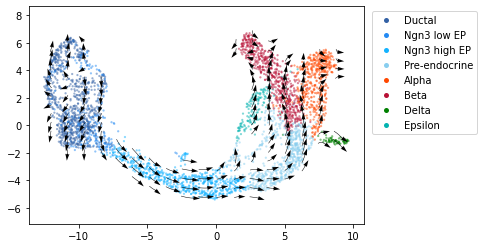

In [78]:
# ['gene','embedding']
output_path="/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/cell_velocity_tune"
n_neighbors_list=[10]
add_amt_gene_list=[2000]

mode_list=['gene']
transfer_mode_list=['power10']

pca_n_components_list=[None] # 2d and 3d'
umap_n_list=[None]
umap_n_components_list=[None]

tune_cell_velocity_curve(1,2)

------n_neighbors10
------add_amt_gene2000
neighbors
tranfer mode: log
using gene mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.7303705350050023
0.9475216391447372
0.34703042206064577
neighbors
tranfer mode: log
using cell mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.361843313022101
0.9475216391447372
0.4011788732641769
neighbors
tranfer mode: 2power
using gene mode


/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:368: RuntimeWarning: overflow encountered in multiply
  distances = -2 * safe_sparse_dot(X, Y.T, dense_output=True)
/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:369: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:370: RuntimeWarning: invalid value encountered in add
  distances += YY


(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.794197949923686
0.9475216391447372
0.33910326187542134
neighbors
tranfer mode: 2power
using cell mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.361843313022101
0.9475216391447372
0.4011788732641769
neighbors
tranfer mode: power10
using gene mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.7260833183059447
0.9475216391447372
0.34757618477103275
neighbors
tranfer mode: power10
using cell mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.361843313022101
0.9475216391447372
0.4011788732641769
neighbors
tranfer mode: 2power_norm_multi10
using gene mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.9018554635529985
0.9475216391447372
0.3265226855870356
neighbors
tranfer mode: 2power_norm_multi10
using cell mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.361843313022101
0.9475216391447372
0.4011788732641769
neighbors
tranfer mode: None
None
using gene mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.2119204522240707
0.9475216391447372
0.4283705764337098
neighbors
tranfer mode: None
None
using cell mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.361843313022101
0.9475216391447372
0.4011788732641769


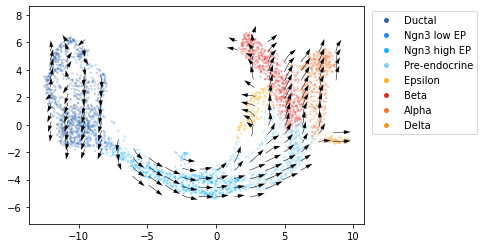

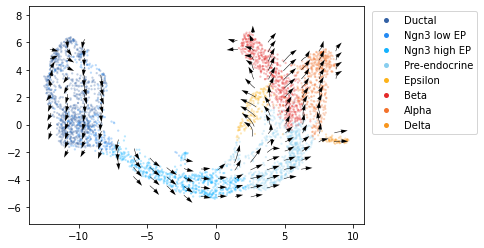

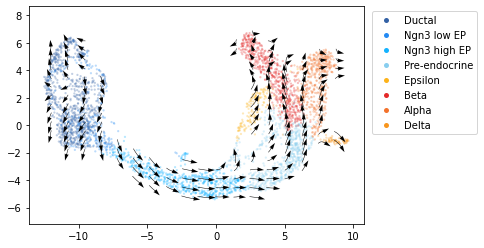

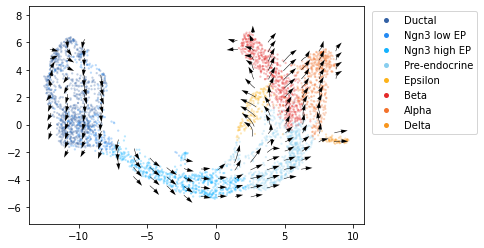

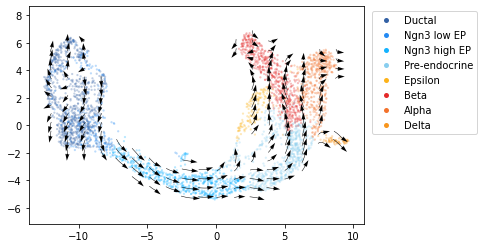

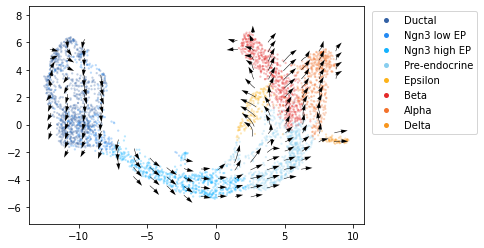

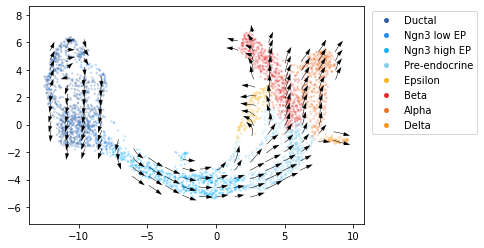

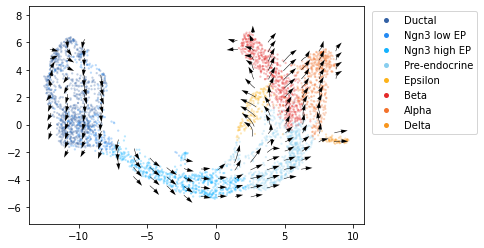

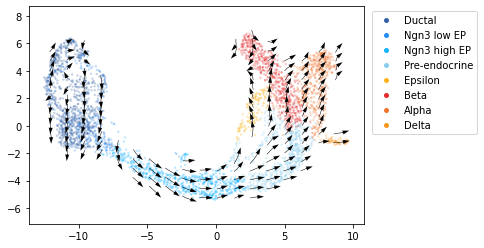

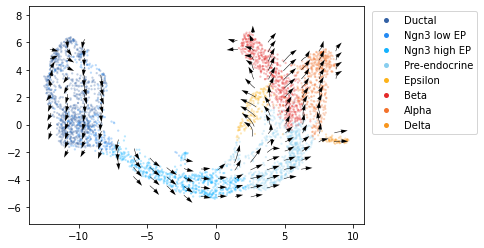

In [51]:
# ['gene','embedding']
n_neighbors_list=[10]
add_amt_gene_list=[2000]

mode_list=['gene','embedding']
transfer_mode_list=['log','2power','power10','2power_norm_multi10',None]

pca_n_components_list=[None] # 2d and 3d'
umap_n_list=[None]
umap_n_components_list=[None]

tune_cell_velocity_curve(load_raw_data,load_cellDancer)

------n_neighbors10
------add_amt_gene2000
neighbors
tranfer mode: log
using umap mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.5297802541618286
0.9475216391447372
0.3745470135542155
neighbors
tranfer mode: log
using umap mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.2148077673092117
0.9475216391447372
0.42781213481831387
neighbors
tranfer mode: log
using umap mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.071229247776515
0.9475216391447372
0.45746825956707154
neighbors
tranfer mode: log
using umap mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.2693457118517557
0.9475216391447372
0.41753075972350295
neighbors
tranfer mode: 2power
using umap mode
Exception: _transfer2power_modeumap_pcaNNone_umapN5_umapNcomponents2_minMass20_grid_step20
neighbors
tranfer mode: 2power
using umap mode
Exception: _transfer2power_modeumap_pcaNNone_umapN5_umapNcomponents3_minMass20_grid_step20
neighbors
tranfer mode: 2power
using umap mode
Exception: _transfer2power_modeumap_pcaNNone_umapN10_umapNcomponents2_minMass20_grid_step20
neighbors
tranfer mode: 2power
using umap mode
Exception: _transfer2power_modeumap_pcaNNone_umapN10_umapNcomponents3_minMass20_grid_step20
neighbors
tranfer mode: power10
using umap mode


/Users/wanglab/.local/lib/python3.7/site-packages/umap/umap_.py:133: UserWarning: A large number of your vertices were disconnected from the manifold.
Disconnection_distance = inf has removed 8231244 edges.
It has fully disconnected 1120 vertices.
You might consider using find_disconnected_points() to find and remove these points from your data.
Use umap.utils.disconnected_vertices() to identify them.
  f"A large number of your vertices were disconnected from the manifold.\n"
/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


Exception: _transferpower10_modeumap_pcaNNone_umapN5_umapNcomponents2_minMass20_grid_step20
neighbors
tranfer mode: power10
using umap mode


/Users/wanglab/.local/lib/python3.7/site-packages/umap/umap_.py:133: UserWarning: A large number of your vertices were disconnected from the manifold.
Disconnection_distance = inf has removed 8231244 edges.
It has fully disconnected 1120 vertices.
You might consider using find_disconnected_points() to find and remove these points from your data.
Use umap.utils.disconnected_vertices() to identify them.
  f"A large number of your vertices were disconnected from the manifold.\n"
/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


Exception: _transferpower10_modeumap_pcaNNone_umapN5_umapNcomponents3_minMass20_grid_step20
neighbors
tranfer mode: power10
using umap mode


/Users/wanglab/.local/lib/python3.7/site-packages/umap/umap_.py:133: UserWarning: A large number of your vertices were disconnected from the manifold.
Disconnection_distance = inf has removed 8231244 edges.
It has fully disconnected 1120 vertices.
You might consider using find_disconnected_points() to find and remove these points from your data.
Use umap.utils.disconnected_vertices() to identify them.
  f"A large number of your vertices were disconnected from the manifold.\n"
/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


Exception: _transferpower10_modeumap_pcaNNone_umapN10_umapNcomponents2_minMass20_grid_step20
neighbors
tranfer mode: power10
using umap mode


/Users/wanglab/.local/lib/python3.7/site-packages/umap/umap_.py:133: UserWarning: A large number of your vertices were disconnected from the manifold.
Disconnection_distance = inf has removed 8231244 edges.
It has fully disconnected 1120 vertices.
You might consider using find_disconnected_points() to find and remove these points from your data.
Use umap.utils.disconnected_vertices() to identify them.
  f"A large number of your vertices were disconnected from the manifold.\n"
/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


Exception: _transferpower10_modeumap_pcaNNone_umapN10_umapNcomponents3_minMass20_grid_step20
neighbors
tranfer mode: 2power_norm_multi10
using umap mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.426493104268726
0.9475216391447372
0.39049014294656015
neighbors
tranfer mode: 2power_norm_multi10
using umap mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.303173386659011
0.9475216391447372
0.411398310102573
neighbors
tranfer mode: 2power_norm_multi10
using umap mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.3063615564054993
0.9475216391447372
0.41082961884842745
neighbors
tranfer mode: 2power_norm_multi10
using umap mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.378261301246389
0.9475216391447372
0.3984093920412211
neighbors
tranfer mode: None
None
using umap mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


1.6577013154580824
0.9475216391447372
0.5715876740333664
neighbors
tranfer mode: None
None
using umap mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


1.7260914658166493
0.9475216391447372
0.5489405734918255
neighbors
tranfer mode: None
None
using umap mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


1.594925048466602
0.9475216391447372
0.5940853710058078
neighbors
tranfer mode: None
None
using umap mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


1.6208839725485127
0.9475216391447372
0.5845709225287427


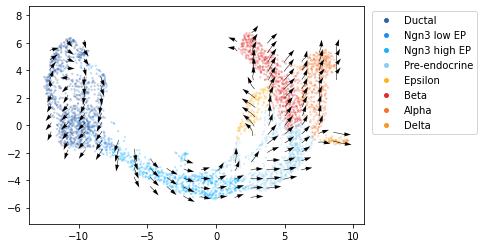

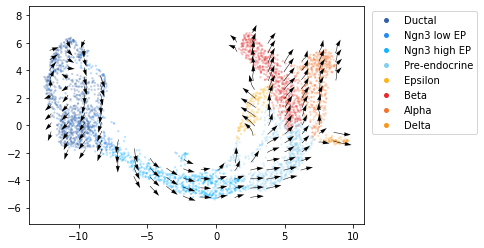

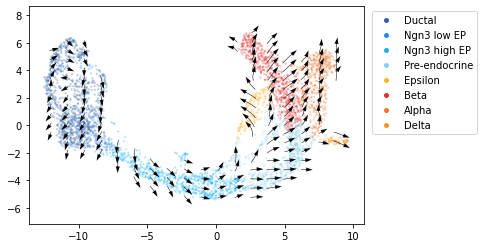

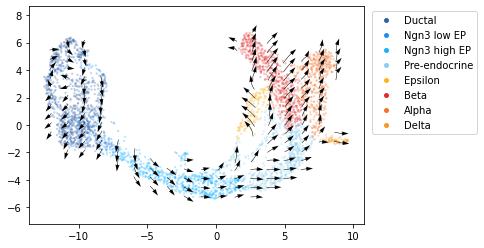

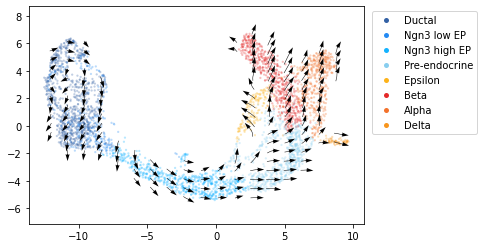

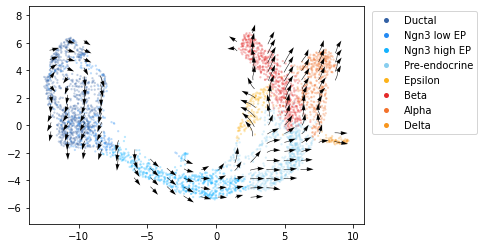

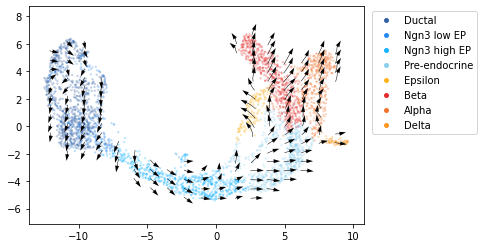

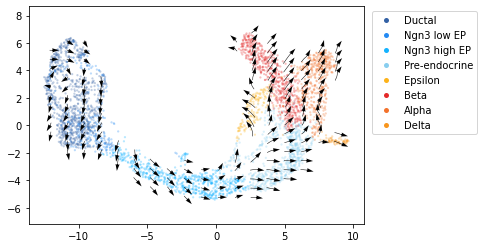

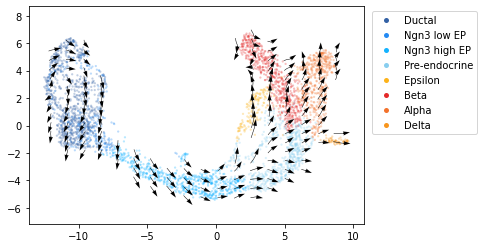

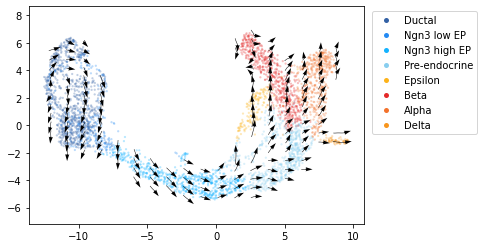

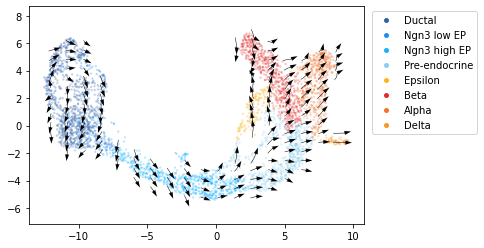

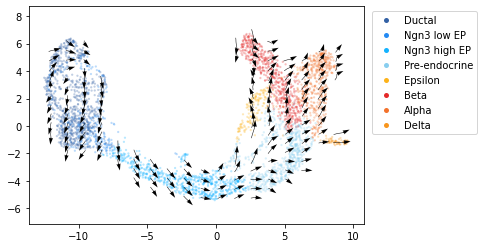

In [52]:
# ['umap']
n_neighbors_list=[10]
add_amt_gene_list=[2000]

mode_list=['umap']
transfer_mode_list=['log','2power','power10','2power_norm_multi10',None]

pca_n_components_list=[None] # 2d and 3d'
umap_n_list=[5,10]
umap_n_components_list=[2,3]

tune_cell_velocity_curve(load_raw_data,load_cellDancer)

------n_neighbors10
------add_amt_gene2000
neighbors
tranfer mode: log
using pca mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


3.1495825240285162
0.9475216391447372
0.3008403913585337
neighbors
tranfer mode: log
using pca mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.5916831503577056
0.9475216391447372
0.3656008794956126
neighbors
tranfer mode: log
using pca mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.8051450277783565
0.9475216391447372
0.3377799114704468
neighbors
tranfer mode: log
pca_norm
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


3.3836822668095152
0.9475216391447372
0.2800267768752881
neighbors
tranfer mode: log
pca_norm
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


3.6012252693085043
0.9475216391447372
0.26311090484119515
neighbors
tranfer mode: log
pca_norm
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


3.237371237506416
0.9475216391447372
0.2926824171930821
neighbors
tranfer mode: 2power
using pca mode


/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:593: RuntimeWarning: overflow encountered in square
  self.explained_variance_ = (S ** 2) / (n_samples - 1)
/Users/wanglab/.local/lib/python3.7/site-packages/numpy/core/_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:595: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var.sum()
/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:599: RuntimeWarning: invalid value encountered in double_scalars
  self.noise_variance_ = total_var.sum() - self.explained_variance_.sum()


(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


6.934083916671181
0.9475216391447372
0.136646981855335
neighbors
tranfer mode: 2power
using pca mode


/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:593: RuntimeWarning: overflow encountered in square
  self.explained_variance_ = (S ** 2) / (n_samples - 1)
/Users/wanglab/.local/lib/python3.7/site-packages/numpy/core/_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:595: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var.sum()
/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:599: RuntimeWarning: invalid value encountered in double_scalars
  self.noise_variance_ = total_var.sum() - self.explained_variance_.sum()


(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


6.915238798823062
0.9475216391447372
0.13701936646150245
neighbors
tranfer mode: 2power
using pca mode


/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:593: RuntimeWarning: overflow encountered in square
  self.explained_variance_ = (S ** 2) / (n_samples - 1)
/Users/wanglab/.local/lib/python3.7/site-packages/numpy/core/_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:595: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var.sum()
/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:599: RuntimeWarning: invalid value encountered in double_scalars
  self.noise_variance_ = total_var.sum() - self.explained_variance_.sum()


(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


6.915238335696008
0.9475216391447372
0.13701937563795777
neighbors
tranfer mode: 2power
pca_norm


/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:593: RuntimeWarning: overflow encountered in square
  self.explained_variance_ = (S ** 2) / (n_samples - 1)
/Users/wanglab/.local/lib/python3.7/site-packages/numpy/core/_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:595: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var.sum()
/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:599: RuntimeWarning: invalid value encountered in double_scalars
  self.noise_variance_ = total_var.sum() - self.explained_variance_.sum()


(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


6.935643084835759
0.9475216391447372
0.1366162629124355
neighbors
tranfer mode: 2power
pca_norm


/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:593: RuntimeWarning: overflow encountered in square
  self.explained_variance_ = (S ** 2) / (n_samples - 1)
/Users/wanglab/.local/lib/python3.7/site-packages/numpy/core/_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:595: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var.sum()
/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:599: RuntimeWarning: invalid value encountered in double_scalars
  self.noise_variance_ = total_var.sum() - self.explained_variance_.sum()


(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


6.927307831793205
0.9475216391447372
0.13678064583705116
neighbors
tranfer mode: 2power
pca_norm


/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:593: RuntimeWarning: overflow encountered in square
  self.explained_variance_ = (S ** 2) / (n_samples - 1)
/Users/wanglab/.local/lib/python3.7/site-packages/numpy/core/_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:595: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var.sum()
/Users/wanglab/.local/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:599: RuntimeWarning: invalid value encountered in double_scalars
  self.noise_variance_ = total_var.sum() - self.explained_variance_.sum()


(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


6.930459740268514
0.9475216391447372
0.13671843927456773
neighbors
tranfer mode: power10
using pca mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


5.22039027097357
0.9475216391447372
0.18150398532714115
neighbors
tranfer mode: power10
using pca mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


3.9237735498803
0.9475216391447372
0.2414822433301847
neighbors
tranfer mode: power10
using pca mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


3.407875305414581
0.9475216391447372
0.27803882308700484
neighbors
tranfer mode: power10
pca_norm
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


5.220390548911733
0.9475216391447372
0.18150397566371007
neighbors
tranfer mode: power10
pca_norm
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


4.231451160669894
0.9475216391447372
0.22392356739259447
neighbors
tranfer mode: power10
pca_norm
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


3.995326243465619
0.9475216391447372
0.23715751390625853
neighbors
tranfer mode: 2power_norm_multi10
using pca mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


3.4151765705958597
0.9475216391447372
0.27744440720949876
neighbors
tranfer mode: 2power_norm_multi10
using pca mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


3.4536677568405922
0.9475216391447372
0.27435228454387517
neighbors
tranfer mode: 2power_norm_multi10
using pca mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))
/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/velocity_plot.py:228: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


3.0737956001965707
0.9475216391447372
0.308257855234142
neighbors
tranfer mode: 2power_norm_multi10
pca_norm
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


3.4896712783979265
0.9475216391447372
0.271521746191445
neighbors
tranfer mode: 2power_norm_multi10
pca_norm
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


3.447308201633054
0.9475216391447372
0.27485840653756416
neighbors
tranfer mode: 2power_norm_multi10
pca_norm
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.943555905467964
0.9475216391447372
0.32189694015480264
neighbors
tranfer mode: None
None
using pca mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.3642686523439638
0.9475216391447372
0.40076733166738604
neighbors
tranfer mode: None
None
using pca mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


1.9024853896008262
0.9475216391447372
0.4980441081566168
neighbors
tranfer mode: None
None
using pca mode
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


1.8417208145719037
0.9475216391447372
0.5144762613572256
neighbors
tranfer mode: None
None
pca_norm
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.3446646275565843
0.9475216391447372
0.4041181958428596
neighbors
tranfer mode: None
None
pca_norm
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.3468050436314494
0.9475216391447372
0.40374961768385365
neighbors
tranfer mode: None
None
pca_norm
(2000, 3696)
(2000, 3696)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.3955423173432298
0.9475216391447372
0.395535337566311


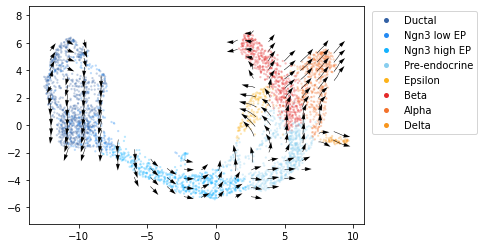

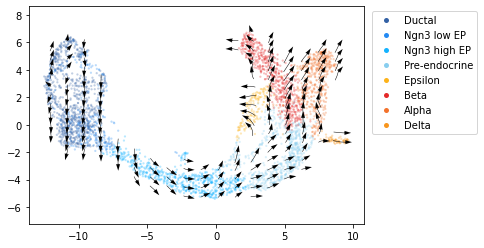

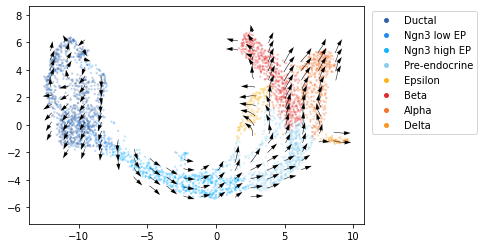

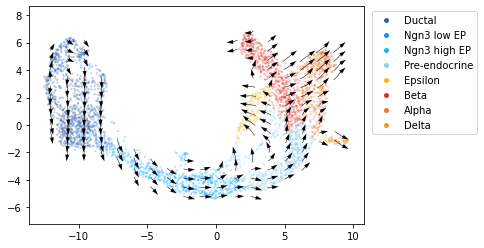

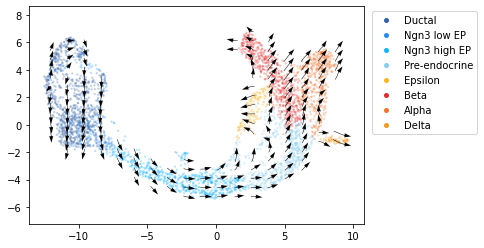

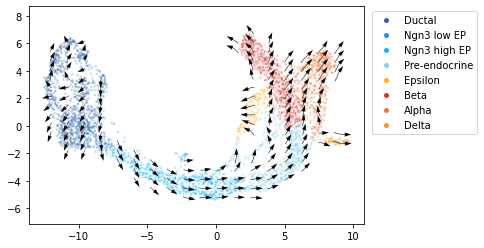

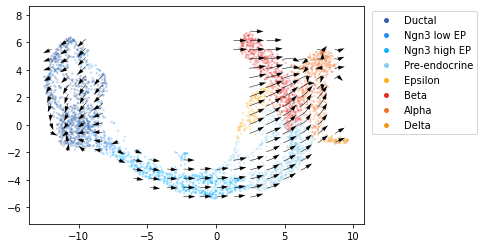

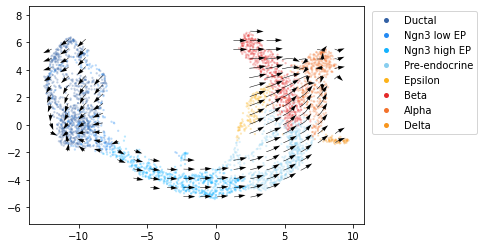

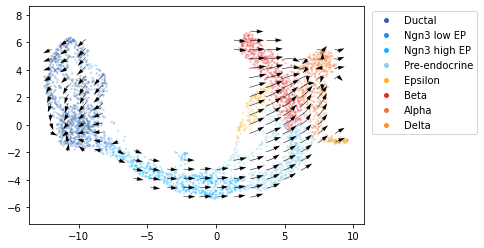

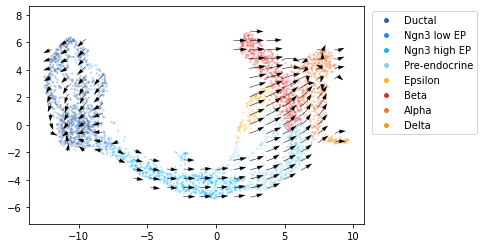

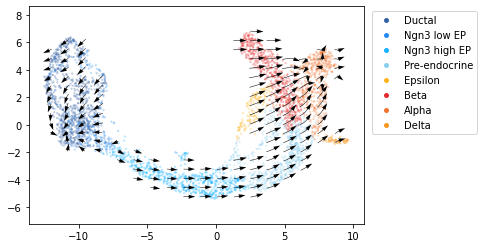

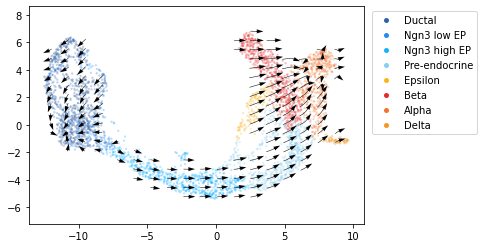

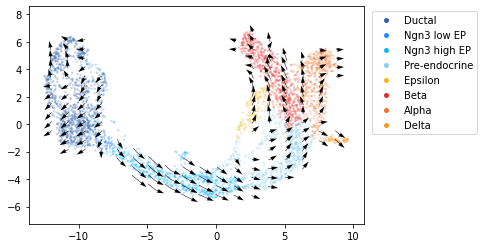

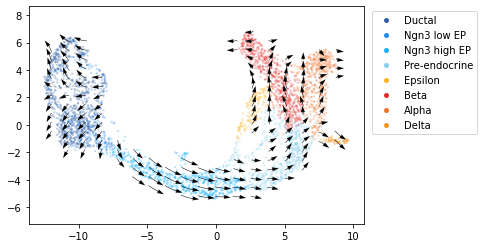

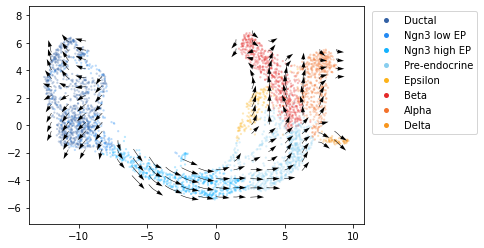

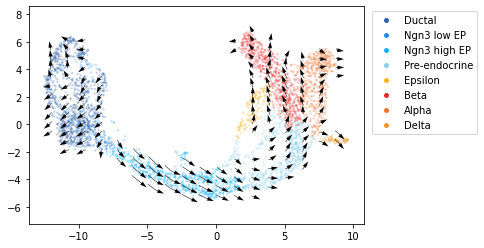

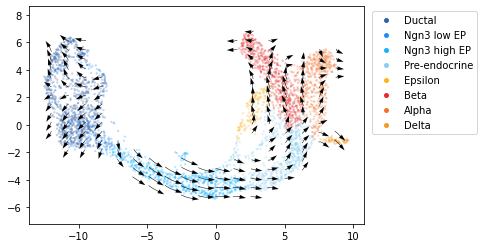

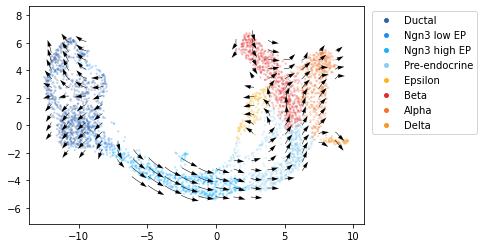

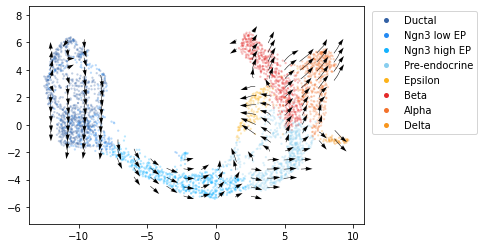

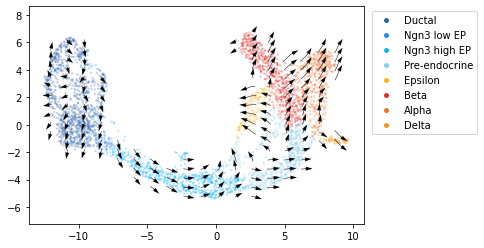

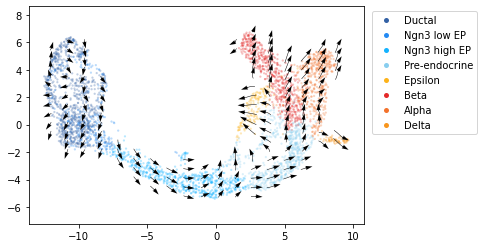

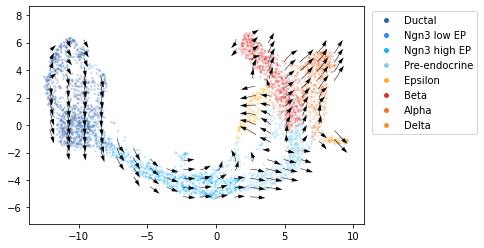

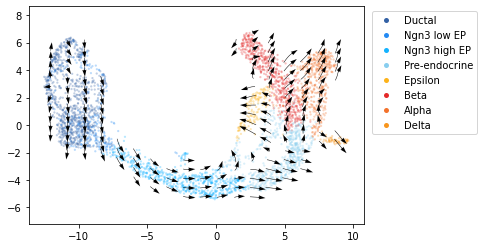

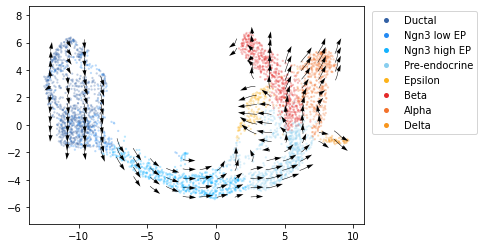

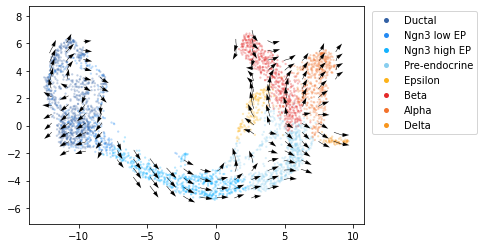

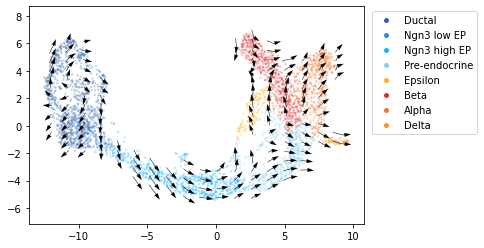

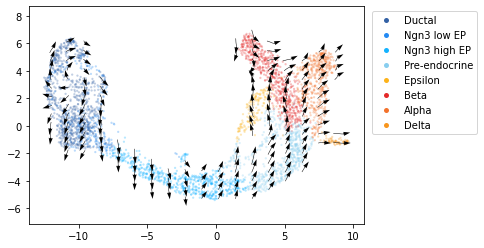

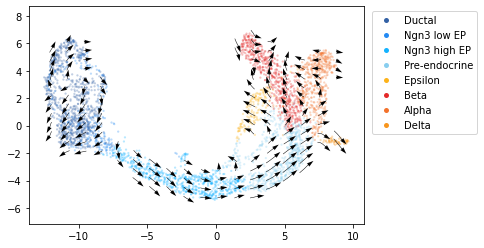

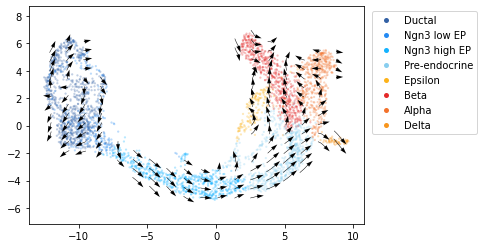

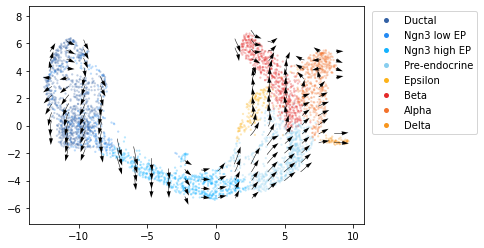

In [53]:
# ['pca','pca_norm']
n_neighbors_list=[10]
add_amt_gene_list=[2000]

mode_list=['pca','pca_norm']
transfer_mode_list=['log','2power','power10','2power_norm_multi10',None]

pca_n_components_list=[3,4,5]
umap_n_list=[None]
umap_n_components_list=[None]

tune_cell_velocity_curve(load_raw_data,load_cellDancer)

------n_neighbors10
------add_amt_gene2000
2.7260833183059447
0.9475216391447372
0.34757618477103275


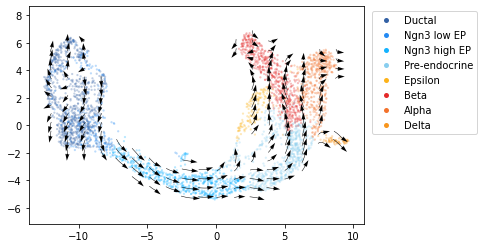

In [47]:
# we finally choose mode='gene', transfer mode='power10'

n_neighbors_list=[10]
add_amt_gene_list=[2000]

mode_list=['gene']
transfer_mode_list=['power10']

pca_n_components_list=[None] # 2d and 3d'
umap_n_list=[None]
umap_n_components_list=[None]

min_mass_list=[20]
grid_step_list=[20]

color_list_full=[solarExtra02]

tune_cell_velocity_curve(load_raw_data,load_cellDancer)



In [60]:
embed_test=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/cell_velocity_tune/velocity_embedding_tune_n10_gAmt2000_transferpower10_modegene_pcaNNone_umapNNone_umapNcomponentsNone_minMass20_grid_step20_colorful_grid_curve_arrow.csv',index_col =0)

In [57]:
embed_test



embedding1  embedding2  embedding1_n10_gAmt2000  embedding2_n10_gAmt2000
0       6.143066   -0.063644                -0.202400                 0.448064
1      -9.906417    0.197778                -0.084827                -0.423041
2       7.559791    0.583762                 0.025003                -0.031503
3     -11.283765    4.218998                 0.126349                 0.061629
4       1.721565   -4.753407                 0.324689                -0.067489
...          ...         ...                      ...                      ...
3691    4.768472   -1.388353                 0.048966                 0.227505
3692   -1.873335   -4.182650                 0.176882                 0.019544
3693   -9.882250   -0.105594                -0.098874                -0.027348
3694    6.612424    4.531895                -0.118486                -0.034499
3695    3.071044    1.120432                 0.324779                 0.772376

[3696 rows x 4 columns]

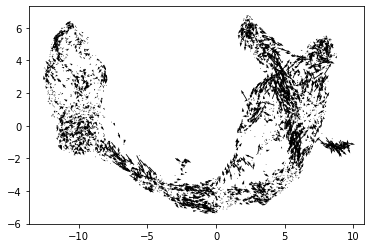

In [58]:
plt.quiver(embed_test.embedding1,embed_test.embedding2,embed_test.embedding1_n10_gAmt2000,embed_test.embedding2_n10_gAmt2000)
plt.savefig('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/cell_velocity_tune/velocity_embedding_tune_n10_gAmt2000_transferpower10_modegene_pcaNNone_umapNNone_umapNcomponentsNone_minMass10_grid_step20_colorful_grid_curve_arrow_draft.pdf')

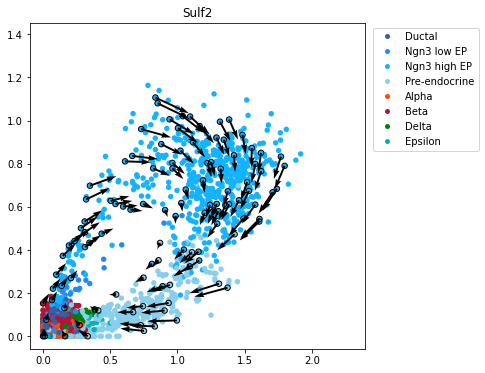

In [82]:
# load raw
raw_data_path = "/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/scv_data_full.csv"
load_raw_data = pd.read_csv(raw_data_path)

# gene velocity plot
load_cellDancer=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/combined_detail/combined_detail.csv')

color_list=solarExtra02.copy()

colors = {'Ductal':color_list[0],
                                            'Ngn3 low EP':color_list[1],
                                            'Ngn3 high EP':color_list[2],
                                            'Pre-endocrine':color_list[3],
                                            'Alpha':'#ff4800',
                                            'Beta':"#B81136",#'#ffb600',#'#f6ad2f',
                                            'Delta':'green',
                                            'Epsilon':'#03B3B0'#'#e05780'#'#fcf300'
                                                     }

four_samples=['Sulf2']

one_gene_raw=load_raw_data[load_raw_data.gene_list==load_raw_data.gene_list.iloc[0]]
cluster_info=one_gene_raw['clusters']
save_dir='/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/gene_velocity/'
for gene in four_samples:
    vpl.velocity_gene(gene,load_cellDancer,colors=colors,mode='cluster',cluster_annot=True,cluster_info=cluster_info,point_size=30,alpha_inside=1,save_path=save_dir+gene+'.pdf')

In [98]:
fold005=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/alpha_gene_marker/heatmap_df_after_p_and_fold_filter_fold_greater_0.05.csv')
fold005.gene_name

0        Krt8
1        Nfib
2      Shank2
3       Rbms3
4       Cyr61
        ...  
606    Mboat4
607      Tnik
608     Gstz1
609      Xkr6
610     Gnao1
Name: gene_name, Length: 611, dtype: object

In [ ]:
samples=['Dner','Btbd11','Jarid2','Rbfox3','Mtch1','Sel1l'] # CLS3
samples=['Map1b','Chga'] # CLS4
samples=['Gcg','Meis2','Smarca1'] # CLS5
samples=fold005.gene_name

# samples=['Sst','Asic2','Ppy'] # CLS7
# samples=['Ghrl','Maged2','Isl1'] # CLS8



for gene in samples:
    vpl.velocity_gene(gene,load_cellDancer,colors=colors,mode='cluster',cluster_annot=True,cluster_info=cluster_info,point_size=30,alpha_inside=1,save_path=save_dir+gene+'.pdf')

In [ ]:
''

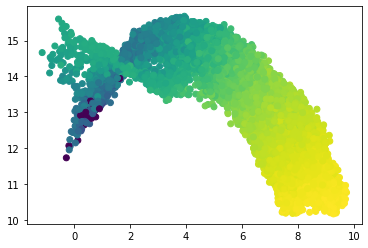

In [6]:
# Hba-x s0 in three clusters
load_raw_data_hba=load_raw_data[load_raw_data.gene_list.isin(['Hba-x'])].reset_index()
load_cellDancer_hba=load_cellDancer[load_cellDancer.gene_name.isin(['Hba-x'])].reset_index()
cell_keep=['Blood progenitors 2','Blood progenitors 1','Erythroid1']
load_raw_data_hba=load_raw_data_hba[load_raw_data_hba.clusters.isin(cell_keep)]
plt.scatter(load_raw_data_hba.embedding1, load_raw_data_hba.embedding2,c=np.log((load_raw_data_hba.s0+0.0001).to_numpy()))
# plt.savefig('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes/cell_level_s0/Hba-x_s0_21BP1_22BP2_23ERY1.pdf')

In [14]:
gene_list=load_cellDancer.gene_name.drop_duplicates()
for i,gene in enumerate(gene_list[2000:2001]):
    print(str(i)+gene)
    vpl.velocity_gene(gene,load_cellDancer,colors=colors,mode='cluster',cluster_annot=True,cluster_info=cluster_info,point_size=30,alpha_inside=1,save_path=save_dir+gene+'.pdf')

In [61]:
        
    def velocity_cell_map_curve_has_embedding(velocity_embedding, n_neighbors=200,add_amt_gene=2000,step=(60,60),save_path=None, save_csv=None,gene_list=None, custom_xlim=None,custom_ylim=None,colors=None,mode='embedding',pca_n_components=4,file_name_additional_info='',umap_n=10,transfer_mode=None,umap_n_components=None,min_mass=2,grid_steps=(30,30),alpha_inside=0.5,use_downsampling=True):
        from get_embedding import get_embedding

        """Cell velocity plot.

        TO DO: load_raw_data contains the cluster information, needs improve
        
        .. image:: https://user-images.githubusercontent.com/31883718/67709134-a0989480-f9bd-11e9-8ae6-f6391f5d95a0.png
        

        Arguments
        ---------
        adata: :class:`~anndata.AnnData`
            Annotated data matrix.
        density: `float` (default: 1)
            Amount of velocities to show - 0 none to 1 all
        arrow_size: `float` or triple `headlength, headwidth, headaxislength` (default: 1)
            Size of arrows.
        arrow_length: `float` (default: 1)
            Length of arrows.
        scale: `float` (default: 1)
            Length of velocities in the embedding.
        {scatter}

        Returns
        -------
        `matplotlib.Axis` if `show==False`
        """
        embedding=velocity_embedding.to_numpy()[:,0:2]
        sampling_ixs=range(0,embedding.shape[0])
        velocity_embedding=velocity_embedding.to_numpy()[:,2:4]

        if colors is not None:
            colors=colors
        else:
            colors = {'CA': grove2[7],
                    'CA1-Sub': grove2[9],
                    'CA2-3-4': grove2[8],
                    'Granule': grove2[6],
                    'ImmGranule1': grove2[6],
                    'ImmGranule2': grove2[6],
                    'Nbl1': grove2[5],
                    'Nbl2': grove2[5],
                    'nIPC': grove2[4],
                    'RadialGlia': grove2[3],
                    'RadialGlia2': grove2[3],
                    'GlialProg': grove2[2],
                    'OPC': grove2[1],
                    'ImmAstro': grove2[0]}
        pointsize = 5

        one_gene_raw = load_raw_data.gene_list[0]

        step_i = 25
        step_j = 25
        from matplotlib.patches import Patch
        from matplotlib.lines import Line2D

        def gen_Line2D(label, markerfacecolor):
            return Line2D([0], [0], color='w', marker='o', label=label, markerfacecolor=markerfacecolor,  markeredgewidth=0, markersize=5)

        legend_elements = []
        for i in colors:
            legend_elements.append(gen_Line2D(i, colors[i]))

        arrow_idx = sampling_neighbors(
            embedding[sampling_ixs, :], step_i=step_i, step_j=step_j)
            
        plt.figure()
        plt.scatter(embedding[:, 0],
                    embedding[:, 1],
                    c=load_raw_data[load_raw_data.gene_list ==
                                    one_gene_raw]['clusters'].map(colors),
                    s=pointsize,
                    # alpha=1,
                    # alpha=0.3,
                    # alpha=0.05,
                    alpha=alpha_inside,
                    edgecolor="none")

        # arrow all points

        # calculate_grid_arrows
        # Source - https://github.com/velocyto-team/velocyto.py/blob/0963dd2df0ac802c36404e0f434ba97f07edfe4b/velocyto/analysis.py
        def grid_curve(embedding, sampling_ixs, velocity_embedding):
            from scipy.stats import norm as normal
            import bezier
            # kernel grid plot

            def calculate_two_end_grid(embedding, sampling_ixs, velocity_embedding, smooth=None, steps=None, min_mass=None):
                def find_neighbors(data, n_neighbors, gridpoints_coordinates):
                    # data  = embedding[sampling_ixs, :]
                    nn = NearestNeighbors(
                        n_neighbors=n_neighbors, n_jobs=8)
                    nn.fit(data)
                    dists, neighs = nn.kneighbors(gridpoints_coordinates)
                    return(dists, neighs)
                # Prepare the grid
                grs = []
                for dim_i in range(embedding[sampling_ixs, :].shape[1]):
                    m, M = np.min(embedding[sampling_ixs, :][:, dim_i]) - \
                        0.2, np.max(
                            embedding[sampling_ixs, :][:, dim_i])-0.2
                    m = m - 0.025 * np.abs(M - m)
                    M = M + 0.025 * np.abs(M - m)
                    gr = np.linspace(m, M, steps[dim_i])
                    grs.append(gr)

                meshes_tuple = np.meshgrid(*grs)
                gridpoints_coordinates = np.vstack(
                    [i.flat for i in meshes_tuple]).T

                n_neighbors = int(velocity_embedding.shape[0]/3)
                dists_head, neighs_head = find_neighbors(
                    embedding[sampling_ixs, :], n_neighbors, gridpoints_coordinates)
                dists_tail, neighs_tail = find_neighbors(
                    embedding[sampling_ixs, :]+velocity_embedding, n_neighbors, gridpoints_coordinates)
                std = np.mean([(g[1] - g[0]) for g in grs])

                # isotropic gaussian kernel
                gaussian_w_head = normal.pdf(
                    loc=0, scale=smooth * std, x=dists_head)
                total_p_mass_head = gaussian_w_head.sum(1)
                gaussian_w_tail = normal.pdf(
                    loc=0, scale=smooth * std, x=dists_tail)
                total_p_mass_tail = gaussian_w_tail.sum(1)

                UZ_head = (velocity_embedding[neighs_head] * gaussian_w_head[:, :, None]).sum(
                    1) / np.maximum(1, total_p_mass_head)[:, None]  # weighed average
                UZ_tail = (velocity_embedding[neighs_tail] * gaussian_w_tail[:, :, None]).sum(
                    1) / np.maximum(1, total_p_mass_tail)[:, None]  # weighed average

                XY = gridpoints_coordinates

                dists_head2, neighs_head2 = find_neighbors(
                    embedding[sampling_ixs, :], n_neighbors, XY+UZ_head)
                dists_tail2, neighs_tail2 = find_neighbors(
                    embedding[sampling_ixs, :], n_neighbors, XY-UZ_tail)

                gaussian_w_head2 = normal.pdf(
                    loc=0, scale=smooth * std, x=dists_head2)
                total_p_mass_head2 = gaussian_w_head2.sum(1)
                gaussian_w_tail2 = normal.pdf(
                    loc=0, scale=smooth * std, x=dists_tail2)
                total_p_mass_tail2 = gaussian_w_tail2.sum(1)

                UZ_head2 = (velocity_embedding[neighs_head2] * gaussian_w_head2[:, :, None]).sum(
                    1) / np.maximum(1, total_p_mass_head2)[:, None]  # weighed average
                UZ_tail2 = (velocity_embedding[neighs_tail2] * gaussian_w_tail2[:, :, None]).sum(
                    1) / np.maximum(1, total_p_mass_tail2)[:, None]  # weighed average

                mass_filter = total_p_mass_head < min_mass

                # filter dots
                UZ_head_filtered = UZ_head[~mass_filter, :]
                UZ_tail_filtered = UZ_tail[~mass_filter, :]
                UZ_head2_filtered = UZ_head2[~mass_filter, :]
                UZ_tail2_filtered = UZ_tail2[~mass_filter, :]
                XY_filtered = XY[~mass_filter, :]
                return(XY_filtered, UZ_head_filtered, UZ_tail_filtered, UZ_head2_filtered, UZ_tail2_filtered, mass_filter, grs)

            XY_filtered, UZ_head_filtered, UZ_tail_filtered, UZ_head2_filtered, UZ_tail2_filtered, mass_filter, grs = calculate_two_end_grid(
                embedding, sampling_ixs, velocity_embedding, smooth=0.8, steps=grid_steps, min_mass=min_mass)

            # plt.quiver(XY_filtered[:, 0], XY_filtered[:, 1], UZ_head_filtered[:, 0], UZ_head_filtered[:, 1], zorder=20000, color='blue')
            # plt.quiver(XY_filtered[:, 0]-UZ_tail_filtered[:, 0], XY_filtered[:, 1]-UZ_tail_filtered[:, 1], UZ_tail_filtered[:, 0], UZ_tail_filtered[:, 1], zorder=20000, color='red')
            # plt.savefig('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/detailcsv/cost_v1_all_gene/cell_velocity/two_end.pdf')

            #######################################################
            ############ connect two end grid to curve ############
            #######################################################
            n_curves = XY_filtered.shape[0]
            s_vals = np.linspace(0.0, 1.5, 15)
            ############ get longest distance len and norm ratio ############
            XYM = XY_filtered
            UVT = UZ_tail_filtered
            UVH = UZ_head_filtered
            UVT2 = UZ_tail2_filtered
            UVH2 = UZ_head2_filtered

            def norm_arrow_display_ratio(XYM, UVT, UVH, UVT2, UVH2, grs, s_vals):
                '''get the longest distance in prediction between the five points,
                and normalize by using the distance between two grids'''

                def distance(x, y):
                    # calc disctnce list between a set of coordinate
                    calculate_square = np.subtract(
                        x[0:-1], x[1:])**2 + np.subtract(y[0:-1], y[1:])**2
                    distance_result = (calculate_square)**0.5
                    return distance_result

                max_discance = 0
                for i in range(n_curves):
                    nodes = np.asfortranarray([[XYM[i, 0]-UVT[i, 0]-UVT2[i, 0], XYM[i, 0]-UVT[i, 0], XYM[i, 0], XYM[i, 0]+UVH[i, 0], XYM[i, 0]+UVH[i, 0]+UVH2[i, 0]],
                                                [XYM[i, 1]-UVT[i, 1]-UVT2[i, 1], XYM[i, 1]-UVT[i, 1], XYM[i, 1], XYM[i, 1]+UVH[i, 1], XYM[i, 1]+UVH[i, 1]+UVH2[i, 1]]])
                    curve = bezier.Curve(nodes, degree=4)
                    curve_dots = curve.evaluate_multi(s_vals)
                    distance_sum = np.sum(
                        distance(curve_dots[0], curve_dots[1]))
                    max_discance = max(max_discance, distance_sum)
                distance_grid = (
                    abs(grs[0][0]-grs[0][1]) + abs(grs[1][0]-grs[1][1]))/2
                print(max_discance)
                print(distance_grid)
                norm_ratio = distance_grid/max_discance
                print(norm_ratio)
                return(norm_ratio)

            norm_ratio = norm_arrow_display_ratio(
                XYM, UVT, UVH, UVT2, UVH2, grs, s_vals)
            ############ end --- get longest distance len and norm ratio ############

            ############ plot the curve arrow for cell velocity ############

            XYM = XY_filtered
            UVT = UZ_tail_filtered * norm_ratio
            UVH = UZ_head_filtered * norm_ratio
            UVT2 = UZ_tail2_filtered * norm_ratio
            UVH2 = UZ_head2_filtered * norm_ratio

            def plot_cell_velocity_curve(XYM, UVT, UVH, UVT2, UVH2, s_vals):
                plt.axis('equal')
                # TO DO: add 'colorful cell velocity' to here, now there is only curve arrows
                for i in range(n_curves):
                    nodes = np.asfortranarray([[XYM[i, 0]-UVT[i, 0]-UVT2[i, 0], XYM[i, 0]-UVT[i, 0], XYM[i, 0], XYM[i, 0]+UVH[i, 0], XYM[i, 0]+UVH[i, 0]+UVH2[i, 0]],
                                                [XYM[i, 1]-UVT[i, 1]-UVT2[i, 1], XYM[i, 1]-UVT[i, 1], XYM[i, 1], XYM[i, 1]+UVH[i, 1], XYM[i, 1]+UVH[i, 1]+UVH2[i, 1]]])
                    curve = bezier.Curve(nodes, degree=4)
                    curve_dots = curve.evaluate_multi(s_vals)
                    plt.plot(curve_dots[0], curve_dots[1],
                                linewidth=0.5, color='black', alpha=1)

                    # normalize the arrow of the last two points at the tail, to let all arrows has the same size in quiver
                    U = curve_dots[0][-1]-curve_dots[0][-2]
                    V = curve_dots[1][-1]-curve_dots[1][-2]
                    N = np.sqrt(U**2 + V**2)
                    U1, V1 = U/N*0.5, V/N*0.5  # 0.5 is to let the arrow have a suitable size
                    plt.quiver(curve_dots[0][-2], curve_dots[1][-2], U1, V1, units='xy', angles='xy',
                                scale=1, linewidth=0, color='black', alpha=1, minlength=0, width=0.1)

                # used to help identify arrow and line
                # plt.quiver(XY_filtered[:, 0], XY_filtered[:, 1], UZ_head_filtered[:, 0], UZ_head_filtered[:, 1], zorder=20000, color='blue',linewidth=0,alpha=0.2)
                # plt.quiver(XY_filtered[:, 0]-UZ_tail_filtered[:, 0], XY_filtered[:, 1]-UZ_tail_filtered[:, 1], UZ_tail_filtered[:, 0], UZ_tail_filtered[:, 1], zorder=20000, color='red',alpha=0.2)

            plot_cell_velocity_curve(XYM, UVT, UVH, UVT2, UVH2, s_vals)
            ############ end --- plot the curve arrow for cell velocity ############

        grid_curve(embedding, sampling_ixs, velocity_embedding)


        if custom_xlim is not None:
            plt.xlim(custom_xlim[0], custom_xlim[1])
            # plt.xlim(-23, 45) # for neurn dataset
        if custom_ylim is not None:
            plt.ylim(custom_ylim[0], custom_ylim[1])
        
        lgd=plt.legend(handles=legend_elements, bbox_to_anchor=(1.01, 1), loc='upper left')
        # plt.show()
        
        if save_path is not None:
            plt.savefig(os.path.join(save_path,('velocity_embedding_tune_n' + \
            str(n_neighbors)+'_gAmt'+str(add_amt_gene) + \
            file_name_additional_info+\
            '_colorful_grid_curve_arrow.pdf')),bbox_inches='tight',bbox_extra_artists=(lgd,),)
        if save_csv is not None:
            cell_velocity_df=pd.DataFrame({'embedding1':embedding[sampling_ixs, 0],
                         'embedding2':embedding[sampling_ixs, 1],
                         ('embedding1_n'+str(n_neighbors)+'_gAmt'+str(add_amt_gene)):velocity_embedding[:, 0],
                         ('embedding2_n'+str(n_neighbors)+'_gAmt'+str(add_amt_gene)):velocity_embedding[:, 1]})
            cell_velocity_df.to_csv(os.path.join(save_path,('velocity_embedding_tune_n' + \
            str(n_neighbors)+'_gAmt'+str(add_amt_gene) + \
            file_name_additional_info + \
            '_colorful_grid_curve_arrow.csv')))
        

In [ ]:
np